### PROJECT HOUSING DATASET
Analysis slide that you can use in your Housing Dataset project presentation. This slide will detail the analysis performed during the project and summarize your findings.
### BUSINESS OBJECTIVES:
#### Optimize Property Valuation:
Improve pricing accuracy by analyzing key features like square footage and location.<br>
__Identify High-Value Properties__: <br>
Pinpoint properties with high market potential for investors and developers.<br>
__Market Segmentation__: <br>
Segment the housing market to target specific buyer groups and tailor marketing strategies.<br>
__Guide Investment Decisions__: <br>
Provide data-driven insights to help investors and developers make informed choices on where to invest.<br>
__Monitor Market Trends__: <br>
track pricing trends to predict future market conditions and adjust strategies.<br>
__Enhance Customer Decision-Making__: <br>
Offer data-driven insights to assist buyers and sellers in making informed property decisions.<br>
__AIM OF THE PROJECT__:<br>
The aim of this project is to conduct a comprehensive analysis of the housing dataset to derive valuable insights that can guide decision-making in the real estate industry. By exploring key factors such as price, square footage, number of bedrooms, and location, the project aims to:
Optimize property valuations for accurate pricing strategies. Identify trends and market fluctuations to predict future housing market conditions. Provide actionable insights to real estate professionals, investors, and developers to support investment decisions and target marketing efforts effectively.
##### FOUR MAJOR PARTS OF THIS PROJECT:
* DATA UNDERSTANDING
* DATA CLEANING
* DATA ANALYSIS
* RECOMMENDATION

__AIM OF THE PROJECT__:
The aim of this project is to conduct a comprehensive analysis of the housing dataset to derive valuable insights that can guide decision-making in the real estate industry. By exploring key factors such as price, square footage, number of bedrooms, and location, the project aims to: Optimize property valuations for accurate pricing strategies. Identify trends and market fluctuations to predict future housing market conditions. Provide actionable insights to real estate professionals, investors, and developers to support investment decisions and target marketing efforts effectively.

#### DATA UNDERSTANDING
##### REQUIRED LIBRARIES

In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
from scipy import stats
import numpy as np
import statsmodels.api as sm
from statsmodels.stats import weightstats as stests
import random
from scipy.stats import zscore
import statistics
from scipy.stats import shapiro
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
# to avoid warning
import warnings
warnings.filterwarnings('ignore')

In [222]:
df=pd.read_csv("housing.csv")

In [224]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02/05/2014 0:00,3.130000e+05,3,1.50,1340.0,NaN,1.5,0,0,3,1340,0,1955.0,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02/05/2014 0:00,2.384000e+06,5,2.50,3650.0,NaN,2.0,0,4,5,3370,280,1921.0,0,709 W Blaine St,Seattle,WA 98119,USA
2,02/05/2014 0:00,3.420000e+05,3,2.00,1930.0,NaN,1.0,0,0,4,1930,0,1966.0,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02/05/2014 0:00,4.200000e+05,3,2.25,2000.0,NaN,1.0,0,0,4,1000,1000,1963.0,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02/05/2014 0:00,5.500000e+05,4,2.50,1940.0,NaN,1.0,0,0,4,1140,800,1976.0,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,09/07/2014 0:00,3.081667e+05,3,1.75,1510.0,6360.0,1.0,0,0,4,1510,0,NaN,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,09/07/2014 0:00,5.343333e+05,3,2.50,1460.0,7573.0,2.0,0,0,3,1460,0,NaN,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,09/07/2014 0:00,4.169042e+05,3,2.50,3010.0,7014.0,2.0,0,0,3,3010,0,NaN,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,10/07/2014 0:00,2.034000e+05,4,2.00,2090.0,6630.0,1.0,0,0,3,1070,1020,NaN,0,5148 S Creston St,Seattle,WA 98178,USA


### Data understanding

In [227]:
# first 5 rows of the dataset
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02/05/2014 0:00,313000.0,3,1.50,1340.0,NaN,1.5,0,0,3,1340,0,1955.0,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02/05/2014 0:00,2384000.0,5,2.50,3650.0,NaN,2.0,0,4,5,3370,280,1921.0,0,709 W Blaine St,Seattle,WA 98119,USA
2,02/05/2014 0:00,342000.0,3,2.00,1930.0,NaN,1.0,0,0,4,1930,0,1966.0,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02/05/2014 0:00,420000.0,3,2.25,2000.0,NaN,1.0,0,0,4,1000,1000,1963.0,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02/05/2014 0:00,550000.0,4,2.50,1940.0,NaN,1.0,0,0,4,1140,800,1976.0,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [229]:
# last 5 rows of the dataset
df.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,09/07/2014 0:00,308166.6667,3,1.75,1510.0,6360.0,1.0,0,0,4,1510,0,NaN,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,09/07/2014 0:00,534333.3333,3,2.50,1460.0,7573.0,2.0,0,0,3,1460,0,NaN,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,09/07/2014 0:00,416904.1667,3,2.50,3010.0,7014.0,2.0,0,0,3,3010,0,NaN,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,10/07/2014 0:00,203400.0000,4,2.00,2090.0,6630.0,1.0,0,0,3,1070,1020,NaN,0,5148 S Creston St,Seattle,WA 98178,USA
4599,10/07/2014 0:00,220600.0000,3,2.50,1490.0,8102.0,2.0,0,0,4,1490,0,NaN,0,18717 SE 258th St,Covington,WA 98042,USA


In [231]:
# variables in dataset
set(df)

{'bathrooms',
 'bedrooms',
 'city',
 'condition',
 'country',
 'date',
 'floors',
 'price',
 'sqft_above',
 'sqft_basement',
 'sqft_living',
 'sqft_lot',
 'statezip',
 'street',
 'view',
 'waterfront',
 'yr_built',
 'yr_renovated'}

In [233]:
# shape of dataset number of rows and columns
df.shape

(4600, 18)

In [234]:
# number of value or data in dataset
df.size

82800

In [237]:
# informations about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4560 non-null   float64
 5   sqft_lot       4586 non-null   float64
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4577 non-null   float64
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4543 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [239]:
# columns in the ddataset
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [241]:
# describe about the dataset
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4560.000000,4.586000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4577.000000,4600.000000
mean,5.539483e+05,3.400870,2.160815,2138.935526,1.485981e+04,1.512065,0.007174,0.240652,3.451739,1840.825435,312.081522,1970.808827,808.608261
std,5.808371e+05,0.908848,0.783781,965.011449,3.592050e+04,0.538288,0.084404,0.778405,0.677230,970.705795,464.137228,29.724793,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,350.000000,0.000000,1900.000000,0.000000
25%,3.225000e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.610000e+05,3.000000,2.250000,1980.000000,7.683500e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.550000e+05,4.000000,2.500000,2620.000000,1.101850e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,20450.000000,4820.000000,2014.000000,2014.000000


### find and replace missing value

In [244]:
#finding missing values
df.isnull().sum()

date              0
price             0
bedrooms          0
bathrooms         0
sqft_living      40
sqft_lot         14
floors            0
waterfront        0
view              0
condition         0
sqft_above        0
sqft_basement     0
yr_built         23
yr_renovated      0
street            0
city             57
statezip          0
country           0
dtype: int64

In [246]:
#finding duplicates
df.duplicated().sum()

0

There is no duplicated values so dont want to drop duplicats

In [249]:
# unique values in sqft_living colum
df["sqft_living"].unique()

array([ 1340.,  3650.,  1930.,  2000.,  1940.,   880.,  1350.,  2710.,
        2430.,  1520.,  1710.,  2920.,  2330.,  1090.,  2910.,  1200.,
        1570.,  3110.,  1370.,  1180.,  2240.,  1450.,  1750.,  2730.,
          nan,   900.,  1650.,  1010.,  2680.,  2200.,  2530.,  2850.,
        2280.,  1900.,  1330.,  1270.,  2170.,  2120.,  2490.,  1990.,
        3690.,  2540.,  1800.,  2340.,  2110.,  1140.,  1480.,  1410.,
        3180.,  2160.,  2350.,  1560.,  2740.,  1680.,  3090.,  4010.,
        2010.,  2370.,  1840.,  2070.,  4340.,   840.,  1240.,  1390.,
        2310.,  1050.,  2550.,  1120.,  2230.,   810.,  3190.,  1670.,
        1970., 13540.,  1880.,  1920.,  3240.,  1550.,  2050.,  2220.,
        1770.,  2300.,  1790.,  2440.,  1160.,  3400.,  4420.,  1571.,
        1620.,  1408.,  3040.,  4490.,  1590.,  2450.,  1440.,  1100.,
        2150.,  1490.,  1030.,   720.,  2020.,  1580.,  1300.,  1630.,
        3370.,  1890.,  1260.,  3470.,  2290.,  2810.,  1640.,  1850.,
      

In [251]:
# mean values of the sqft living column to replace missing values
column_means = np.mean(df["sqft_living"], axis=0)
column_means

2138.9355263157895

In [253]:
# replace the missing values by usning the mean value
df["sqft_living"].fillna(2139.0,inplace=True)

In [255]:
# Unique values of sqft lot column
df["sqft_lot"].unique()

array([  nan, 9480., 9720., ..., 7573., 7014., 8102.])

In [257]:
# describe of sqft lot colum
df["sqft_lot"].describe()

count    4.586000e+03
mean     1.485981e+04
std      3.592050e+04
min      6.380000e+02
25%      5.000000e+03
50%      7.683500e+03
75%      1.101850e+04
max      1.074218e+06
Name: sqft_lot, dtype: float64

In [259]:
# Replaceing with means for missing values in sqft lot column in dataset
df["sqft_lot"].fillna(1.48,inplace=True)

In [261]:
df["country"].unique()

array(['USA'], dtype=object)

In [263]:
# drop function used to drop the columns
df=df.drop("country",axis=1)

* USA is same value in entire colum
* so i droped the country colum

In [266]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,02/05/2014 0:00,3.130000e+05,3,1.50,1340.0,1.48,1.5,0,0,3,1340,0,1955.0,2005,18810 Densmore Ave N,Shoreline,WA 98133
1,02/05/2014 0:00,2.384000e+06,5,2.50,3650.0,1.48,2.0,0,4,5,3370,280,1921.0,0,709 W Blaine St,Seattle,WA 98119
2,02/05/2014 0:00,3.420000e+05,3,2.00,1930.0,1.48,1.0,0,0,4,1930,0,1966.0,0,26206-26214 143rd Ave SE,Kent,WA 98042
3,02/05/2014 0:00,4.200000e+05,3,2.25,2000.0,1.48,1.0,0,0,4,1000,1000,1963.0,0,857 170th Pl NE,Bellevue,WA 98008
4,02/05/2014 0:00,5.500000e+05,4,2.50,1940.0,1.48,1.0,0,0,4,1140,800,1976.0,1992,9105 170th Ave NE,Redmond,WA 98052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,09/07/2014 0:00,3.081667e+05,3,1.75,1510.0,6360.00,1.0,0,0,4,1510,0,NaN,1979,501 N 143rd St,Seattle,WA 98133
4596,09/07/2014 0:00,5.343333e+05,3,2.50,1460.0,7573.00,2.0,0,0,3,1460,0,NaN,2009,14855 SE 10th Pl,Bellevue,WA 98007
4597,09/07/2014 0:00,4.169042e+05,3,2.50,3010.0,7014.00,2.0,0,0,3,3010,0,NaN,0,759 Ilwaco Pl NE,Renton,WA 98059
4598,10/07/2014 0:00,2.034000e+05,4,2.00,2090.0,6630.00,1.0,0,0,3,1070,1020,NaN,0,5148 S Creston St,Seattle,WA 98178


In [268]:
# replacing missing values in year built column by using mode value
mode_value = df['yr_built'].mode().iloc[0]
df['yr_built'].fillna(mode_value, inplace=True)

replacing missing value in year built column by using mode value

In [319]:
# changing yr built type float to int
df["yr_built"].astype("int64")

0       1955
1       1921
2       1966
3       1963
4       1976
        ... 
4595    2006
4596    2006
4597    2006
4598    2006
4599    2006
Name: yr_built, Length: 4600, dtype: int64

In [271]:
# unique value in city column
df["city"].unique()

array(['Shoreline', 'Seattle', 'Kent', 'Bellevue', 'Redmond',
       'Maple Valley', 'North Bend', nan, 'Snoqualmie', 'Renton',
       'Auburn', 'Sammamish', 'Kirkland', 'Issaquah', 'Des Moines',
       'Federal Way', 'Duvall', 'Burien', 'Covington',
       'Inglewood-Finn Hill', 'Kenmore', 'Carnation', 'Newcastle',
       'Woodinville', 'Mercer Island', 'Black Diamond', 'Ravensdale',
       'Bothell', 'Clyde Hill', 'Algona', 'Lake Forest Park', 'Skykomish',
       'Normandy Park', 'Tukwila', 'Vashon', 'Fall City', 'Yarrow Point',
       'SeaTac', 'Medina', 'Enumclaw', 'Snoqualmie Pass', 'Pacific',
       'Beaux Arts Village', 'Preston', 'Milton'], dtype=object)

In [273]:
# replacicng missing value in city colum by using specific value
df["city"].fillna("unknown",inplace=True)

In [275]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
dtype: int64

#### missing values are replaced

### Detecting outliers

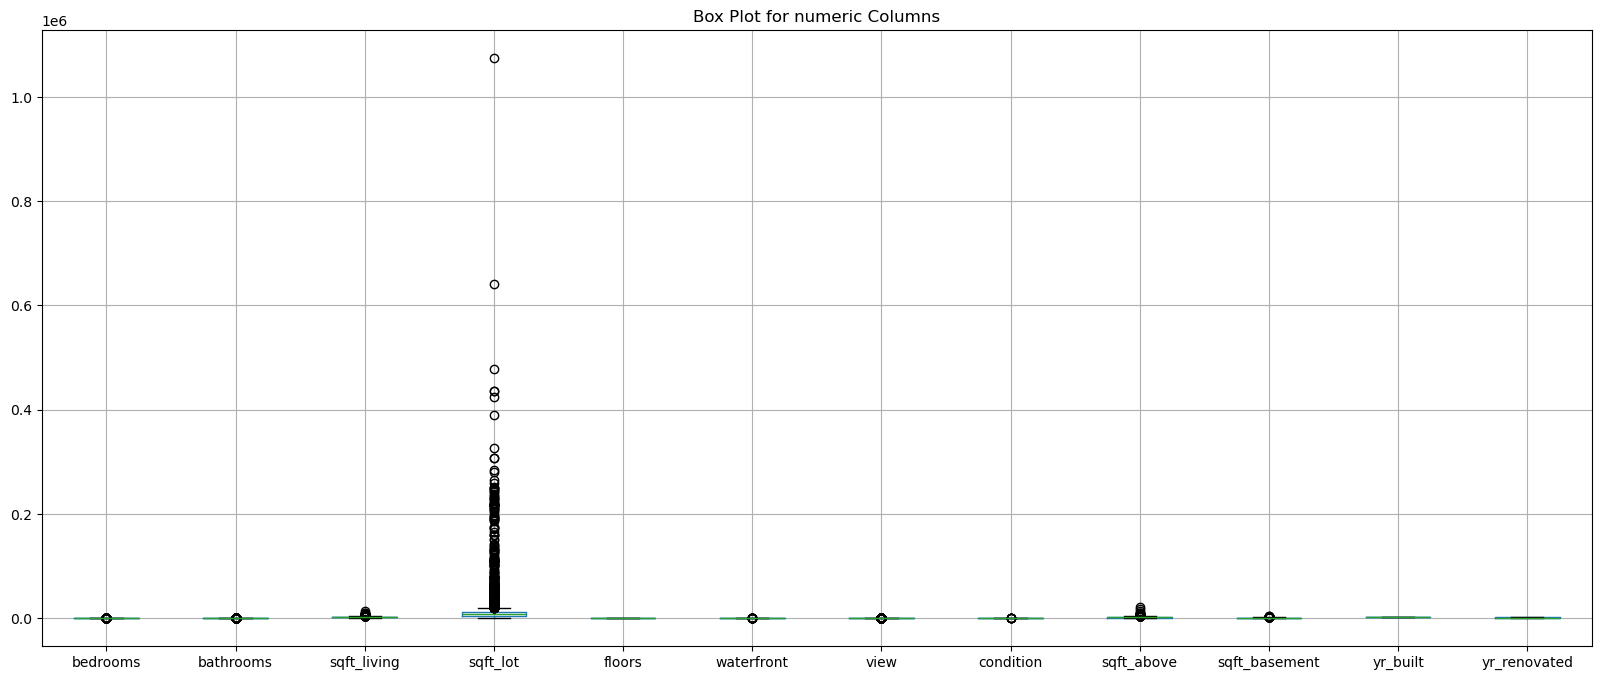

In [279]:
# box plot for numeric columns to find outliers
numeric_columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated']
df[numeric_columns].boxplot(figsize=(20, 8))
plt.title("Box Plot for numeric Columns")
plt.show()

* detecting outliers in these colums[bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view, condition,sqft_above,sqft_basement]
* no outliers in floors and yr_built and yr_renovated


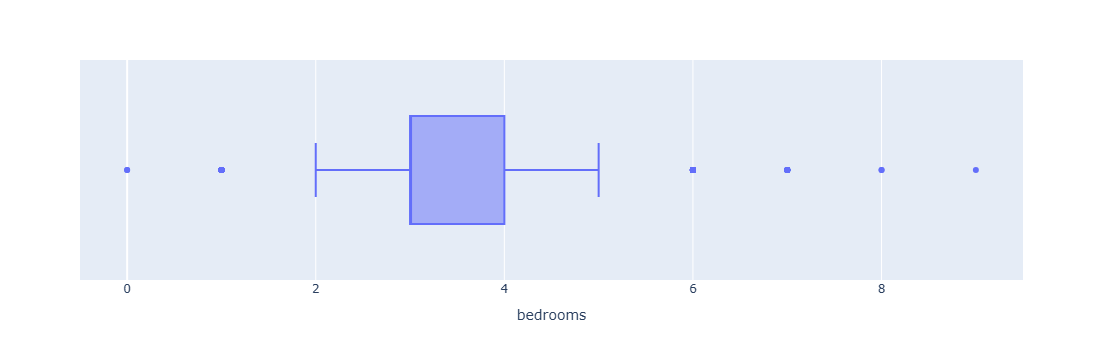

In [281]:
#boxplot for bedrooms
plot_price = px.box(
    data_frame=df,
    x='bedrooms', 
    hover_name= 'bedrooms'
)
plot_price.show()

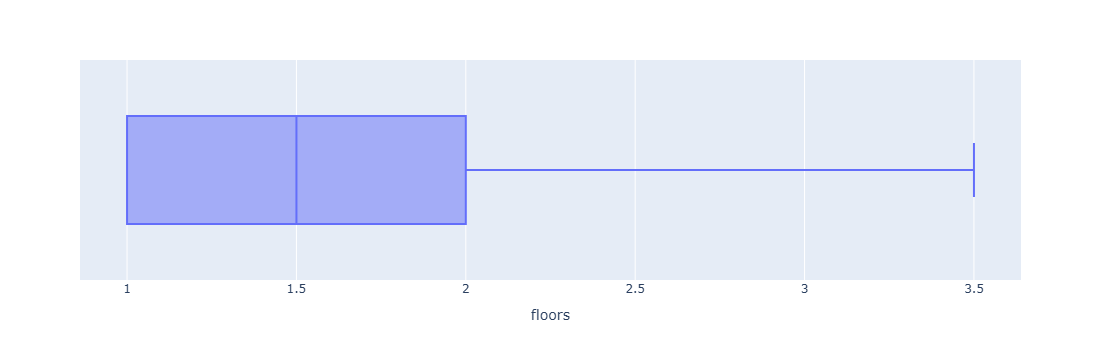

In [353]:
#boxplot for bathrooms
plot_price = px.box(
    data_frame=df,
    x='floors',  
    hover_name= 'floors' 
)
plot_price.show()

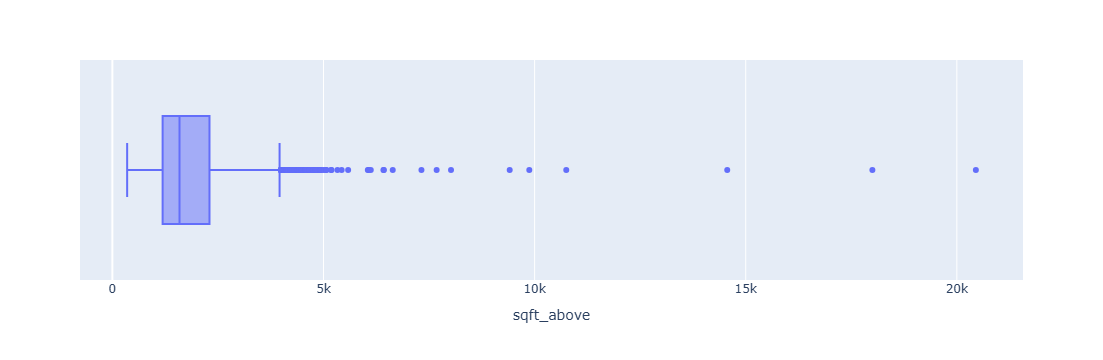

In [284]:
#boxplot for sqft_above
plot_price = px.box(
    data_frame=df,
    x='sqft_above', 
    hover_name= 'sqft_above'
)
plot_price.show()

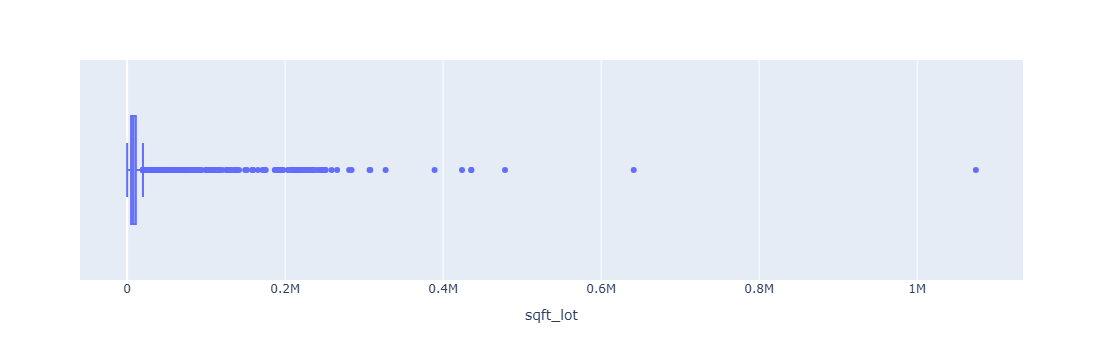

In [285]:
#boxplot for sqft_lot
plot_price = px.box(
    data_frame=df,
    x='sqft_lot', 
    hover_name= 'sqft_lot'
)
plot_price.show()

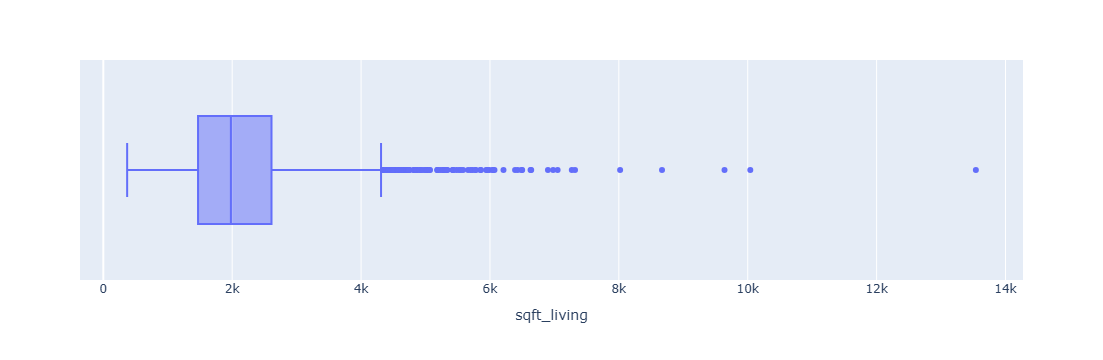

In [287]:
#boxplot for sqft_living
plot_price = px.box(
    data_frame=df,
    x='sqft_living', 
    hover_name= 'sqft_living' 
)
plot_price.show()

In [289]:
# creating new user definded function for remove outliers
# for removeing outliers i used IQR methor
# the values more then upper bond and less then lower bond are considered as a outliers
# def outlier(df, column):
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
df_cleaned = remove_outliers_iqr(df, 'bedrooms')
df_cleaned = remove_outliers_iqr(df_cleaned, 'bathrooms')

* Outliers are removied in bedrooms and bathrooms columns
* no need to remove outliers in any other colums

In [292]:
# cleaned dataset
df_cleaned

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,02/05/2014 0:00,3.130000e+05,3,1.50,1340.0,1.48,1.5,0,0,3,1340,0,1955.0,2005,18810 Densmore Ave N,Shoreline,WA 98133
1,02/05/2014 0:00,2.384000e+06,5,2.50,3650.0,1.48,2.0,0,4,5,3370,280,1921.0,0,709 W Blaine St,Seattle,WA 98119
2,02/05/2014 0:00,3.420000e+05,3,2.00,1930.0,1.48,1.0,0,0,4,1930,0,1966.0,0,26206-26214 143rd Ave SE,Kent,WA 98042
3,02/05/2014 0:00,4.200000e+05,3,2.25,2000.0,1.48,1.0,0,0,4,1000,1000,1963.0,0,857 170th Pl NE,Bellevue,WA 98008
4,02/05/2014 0:00,5.500000e+05,4,2.50,1940.0,1.48,1.0,0,0,4,1140,800,1976.0,1992,9105 170th Ave NE,Redmond,WA 98052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,09/07/2014 0:00,3.081667e+05,3,1.75,1510.0,6360.00,1.0,0,0,4,1510,0,2006.0,1979,501 N 143rd St,Seattle,WA 98133
4596,09/07/2014 0:00,5.343333e+05,3,2.50,1460.0,7573.00,2.0,0,0,3,1460,0,2006.0,2009,14855 SE 10th Pl,Bellevue,WA 98007
4597,09/07/2014 0:00,4.169042e+05,3,2.50,3010.0,7014.00,2.0,0,0,3,3010,0,2006.0,0,759 Ilwaco Pl NE,Renton,WA 98059
4598,10/07/2014 0:00,2.034000e+05,4,2.00,2090.0,6630.00,1.0,0,0,3,1070,1020,2006.0,0,5148 S Creston St,Seattle,WA 98178


#### outliers are removed

### Univariate analysis

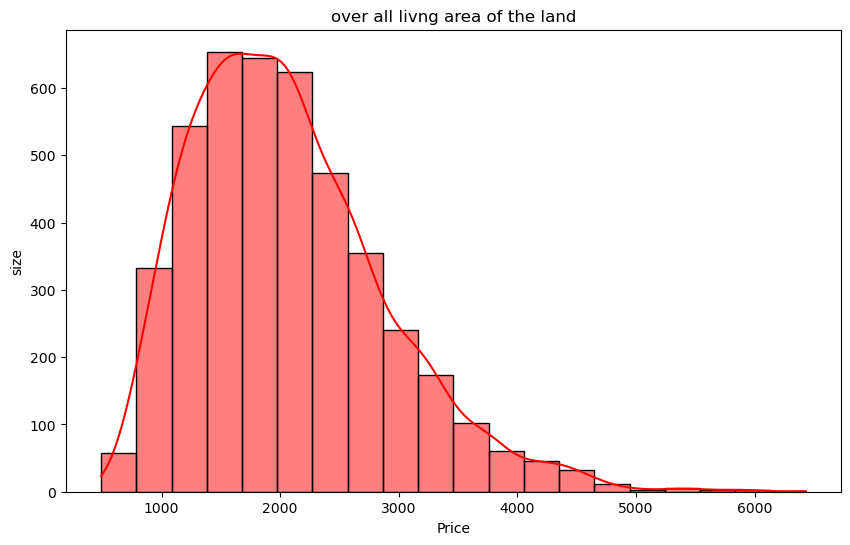

In [296]:
# Plotting histogram for distribution of Sqft_lot
# most commenly living area aroung 2000
#larger houses are less frequent, meaning there are more smaller homes than large ones. 
# so it's right skewed distribution
# the histogram is skewed to the left (longer tail on the left), it means more beans have higher acidity.
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['sqft_living'],color="red", bins=20, kde=True)
plt.title('over all livng area of the land')
plt.xlabel('Price')
plt.ylabel('size')
plt.show()

* Clusters of houses: Peaks in the histogram show where the majority of properties fall in terms of living area.
* Larger homes are rare: If the right tail is sparse, large houses (e.g., 4,000+ sqft) are uncommon in the dataset.
* Useful for pricing: Developers or agents can prioritize houses in the common ranges when estimating demand or market value.
* A peak around 1,500–2,000 sqft: This means most homes in the dataset have modest living areas typical of suburban homes.

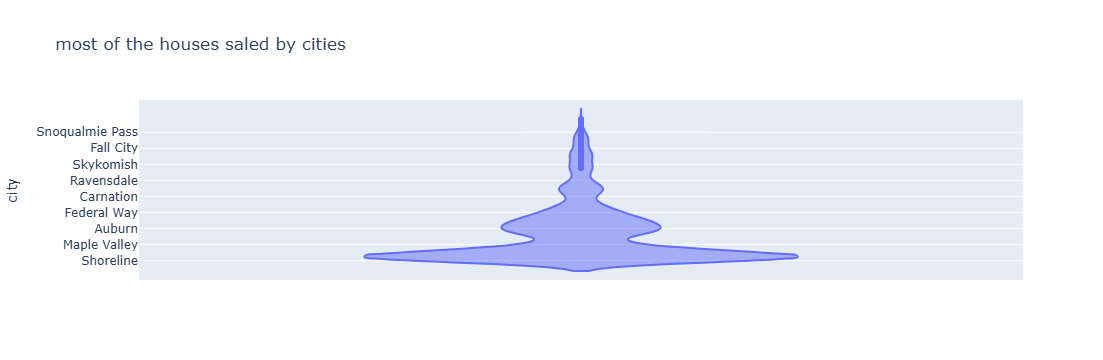

In [300]:
# violin plot for city distribution
# The Y-axis represents the different cities in your dataset. Each unique city is plotted as a category along this axis.
# Like a box plot, the violin plot shows the median (central line) and the interquartile range (the width of the box), giving you insights into the spread and central tendency of the data for each city.
# The width of each violin at different y-values shows where the data is most concentrated for each city. For example, if one city’s violin is much wider than another's at a specific value, it means that city has more properties with that value.

p=px.violin(df_cleaned,y="city",title="most of the houses saled by cities")
p.show()

* Most of the haous saled in Redmond city

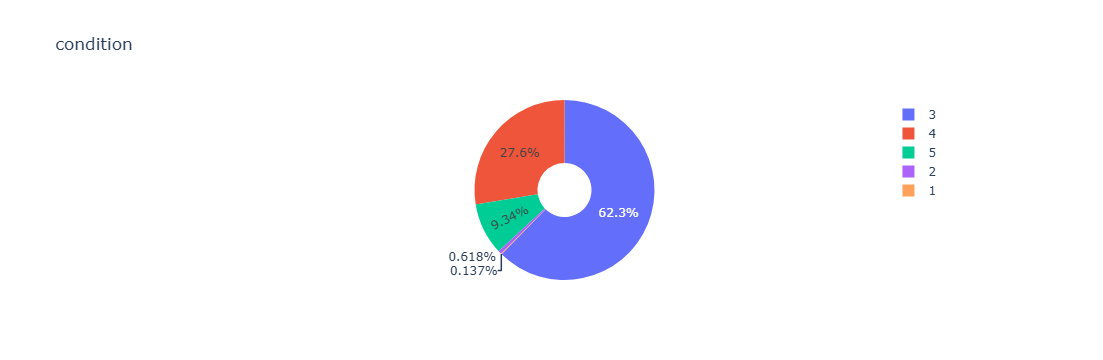

In [302]:
# Donut chart for how conditon distributed
a=px.pie(df_cleaned,names="condition",hole=0.3,title="condition")
a.show()

* 62.3% of datas falls in number 3 condition
* 1 and 2 condition are 0.137% and 0.618% respectively distributed in data
* 4th condition is the second highest distributed condition in this data
* higher condition scores dominate, it could imply a well-maintained housing market.

### Bivariate analysis

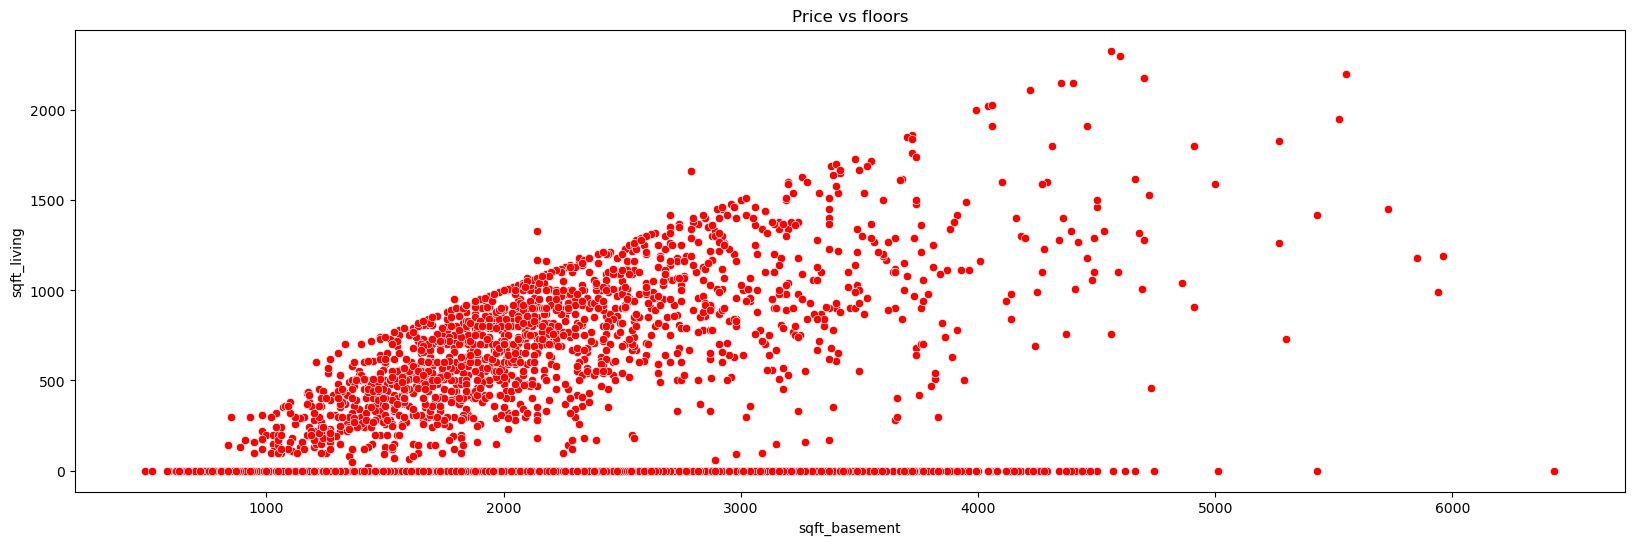

In [305]:
# Scatter plot for sqft_living ans sqft_basement
# The x-axis (sqft_basement) represents the size of the basement in square feet.
# The y-axis (sqft_living) represents the total living area size (including the basement if finished).
plt.figure(figsize=(20, 6))
sns.scatterplot(x='sqft_living', y='sqft_basement', data=df_cleaned,color="red")
plt.title('Price vs floors')
plt.xlabel('sqft_basement')
plt.ylabel('sqft_living')
plt.show()

* the plot shows a positive correlation 
* which means sqft living is increased sqft basement also increased its called as possitive correlation

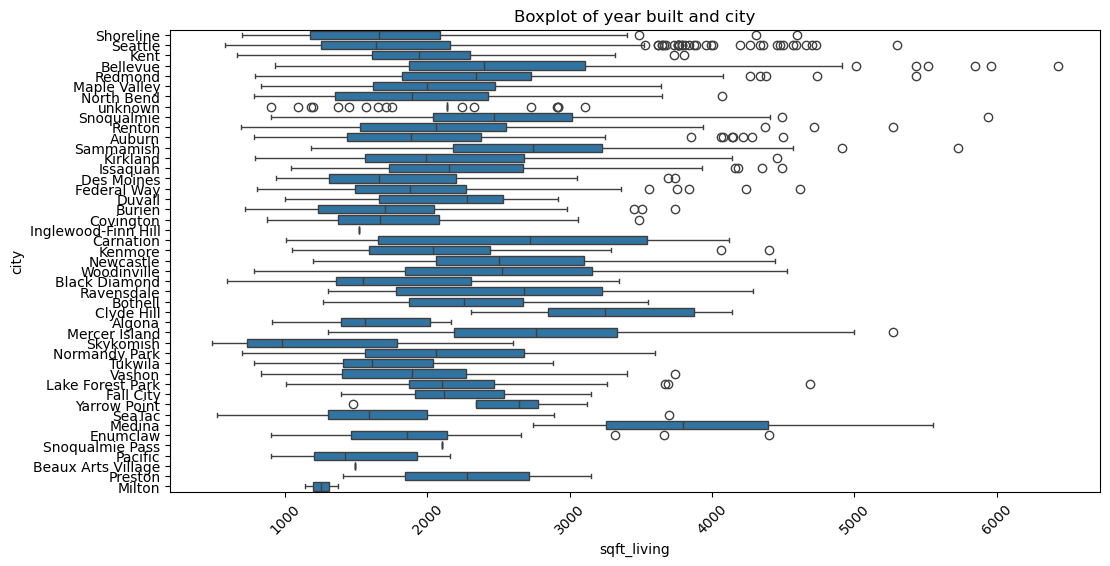

In [306]:
# Boxplot for Sqft_living and city
# boxplot where the x-axis represents the sqft_living (living space square footage) and the y-axis represents the city variable.
plt.figure(figsize=(12, 6))
sns.boxplot(x='sqft_living', y='city', data=df_cleaned)
plt.title('Boxplot of year built and city')
plt.xticks(rotation=45)
plt.show()

### Insights
#### Size Distribution:
* Some cities have a more homogenous distribution of sqft_living, while others (e.g., Seattle, Bellevue) show considerable variability.
This can reflect a mix of property types within the same city, such as condos, townhouses, and larger family homes.
Luxury Properties:
* Outliers in cities like Clyde Hill, Medina, and Mercer Island indicate extremely large homes, suggesting these cities are hubs for high-end, luxury real estate.
Smaller Homes:
* Cities with smaller medians and less variability may have predominantly smaller, affordable homes.

#### Multivariate analysis

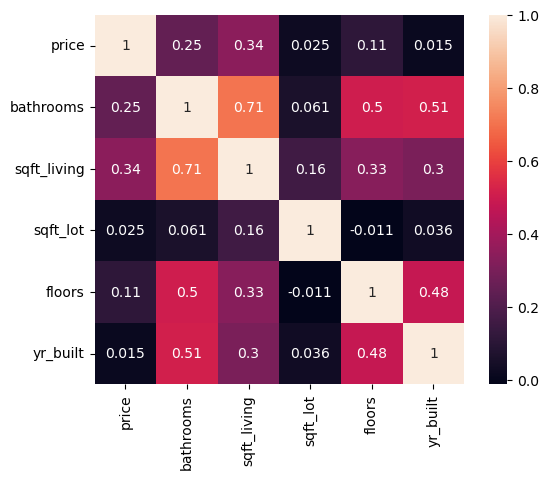

In [308]:
# heatmap
# The heatmap will show a matrix where the intensity of the color represents the strength of the correlation between the pairs of numerical variables in the dataset.
# The values on the diagonal will always be 1, as each variable is perfectly correlated with itself.
# +1: Perfect positive correlation (variables increase together).
# -1: Perfect negative correlation (one variable increases, the other decreases).
# 0: No correlation.
sns.heatmap(data = df_cleaned.select_dtypes('float64').corr(),square=True,annot=True)
plt.show()

### Price vs Other Variables:

* sqft_living shows the strongest positive correlation with price (0.34).
* Larger homes tend to be more expensive, as expected.
* bathrooms also has a moderate positive correlation with price (0.25).
* More bathrooms often indicate higher property value.
* Other features like floors, yr_built, and sqft_lot show weak correlations with price (0.11, 0.017, and 0.025 respectively).


### Insights
1) Primary Features Influencing Price:
* sqft_living and bathrooms are the most important variables correlated with price.
* Other features like floors and sqft_lot have very limited impact on price.
2) Multi-Collinearity:
* bathrooms and sqft_living are highly correlated (0.71), which might indicate multicollinearity. This could be problematic in regression models and * should be considered during feature selection.
3) Low Correlations:
* ome variables like sqft_lot and yr_built show very weak or negligible correlations with price, suggesting they may have little predictive power for price.




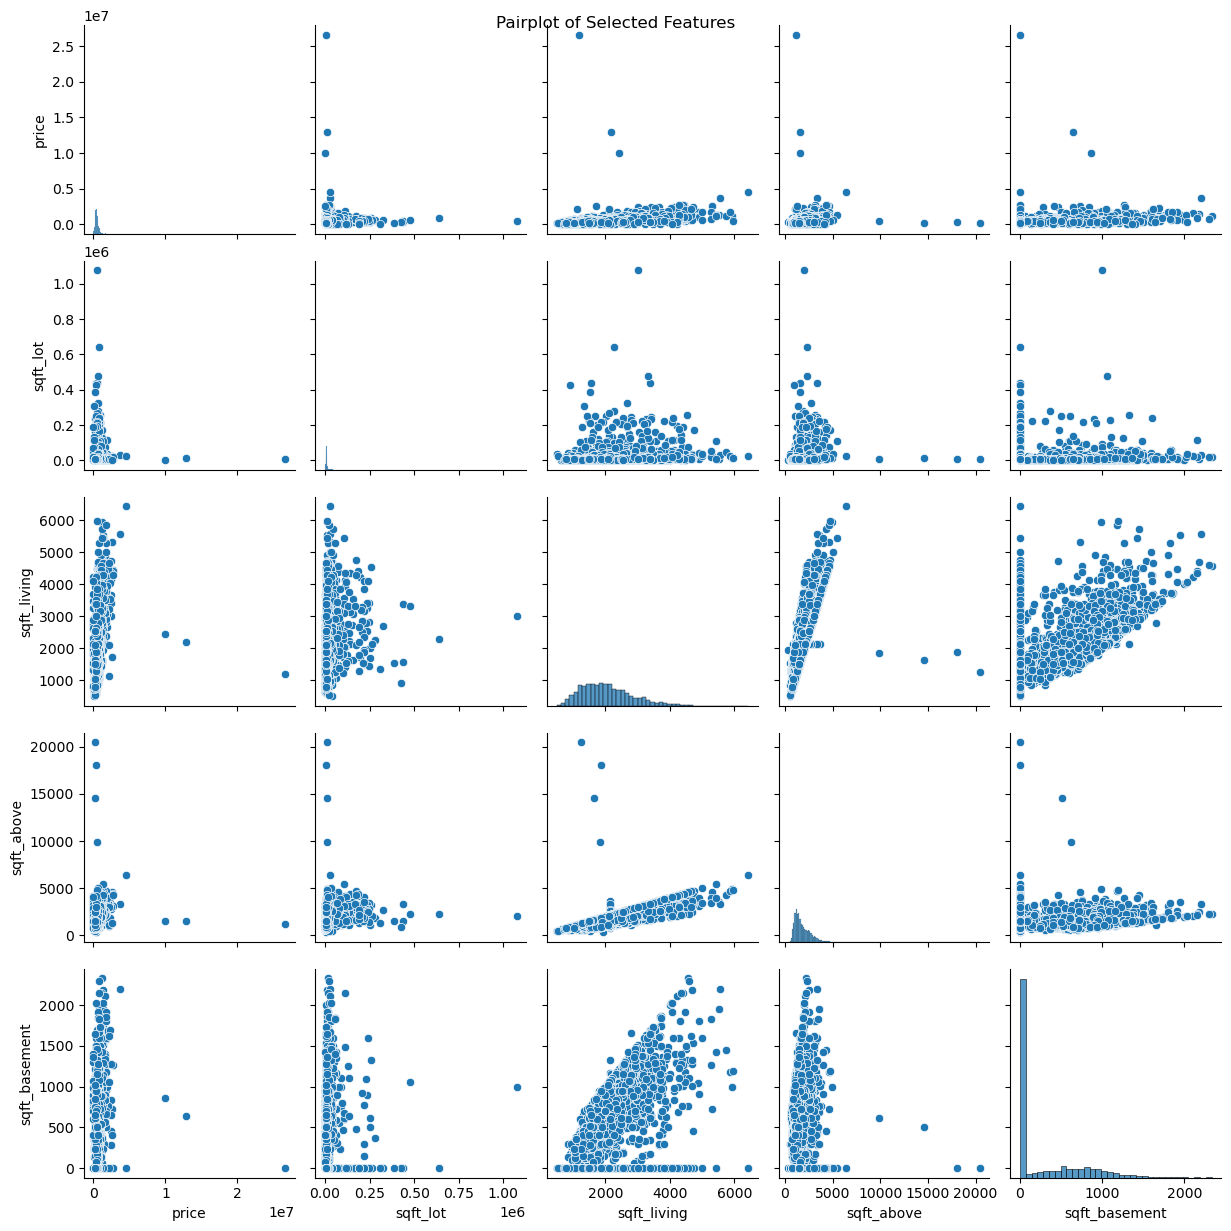

In [309]:
# Pairplot for selected features (price,sqft_lot, sqft_living, sqft_above, sqft_basement)
sns.pairplot(df_cleaned[['price', 'sqft_lot', 'sqft_living','sqft_above','sqft_basement']])
plt.suptitle('Pairplot of Selected Features')
plt.show()

### Derived metrics

In [313]:
# Price Metrics
df_cleaned['price_per_sqft'] = df_cleaned['price'] / df_cleaned['sqft_living']
df_cleaned['price_category'] = pd.qcut(df_cleaned['price'], q=3, labels=['Low', 'Medium', 'High'])

* Creating a new column as price per sqft for easy to understand and huge cost will make clint to uncomfortable, so it is one of the strategy to selling plots
* categories the price colums into 3 parts as low, medium and high 
* it was used to make it as low for everyone can buy a house, medium for afortable price and high for premium and rich.
                                                                                                            

In [314]:
df_cleaned

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,price_per_sqft,price_category
0,02/05/2014 0:00,3.130000e+05,3,1.50,1340.0,1.48,1.5,0,0,3,1340,0,1955.0,2005,18810 Densmore Ave N,Shoreline,WA 98133,233.582090,Low
1,02/05/2014 0:00,2.384000e+06,5,2.50,3650.0,1.48,2.0,0,4,5,3370,280,1921.0,0,709 W Blaine St,Seattle,WA 98119,653.150685,High
2,02/05/2014 0:00,3.420000e+05,3,2.00,1930.0,1.48,1.0,0,0,4,1930,0,1966.0,0,26206-26214 143rd Ave SE,Kent,WA 98042,177.202073,Low
3,02/05/2014 0:00,4.200000e+05,3,2.25,2000.0,1.48,1.0,0,0,4,1000,1000,1963.0,0,857 170th Pl NE,Bellevue,WA 98008,210.000000,Medium
4,02/05/2014 0:00,5.500000e+05,4,2.50,1940.0,1.48,1.0,0,0,4,1140,800,1976.0,1992,9105 170th Ave NE,Redmond,WA 98052,283.505155,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,09/07/2014 0:00,3.081667e+05,3,1.75,1510.0,6360.00,1.0,0,0,4,1510,0,2006.0,1979,501 N 143rd St,Seattle,WA 98133,204.083885,Low
4596,09/07/2014 0:00,5.343333e+05,3,2.50,1460.0,7573.00,2.0,0,0,3,1460,0,2006.0,2009,14855 SE 10th Pl,Bellevue,WA 98007,365.981735,Medium
4597,09/07/2014 0:00,4.169042e+05,3,2.50,3010.0,7014.00,2.0,0,0,3,3010,0,2006.0,0,759 Ilwaco Pl NE,Renton,WA 98059,138.506368,Medium
4598,10/07/2014 0:00,2.034000e+05,4,2.00,2090.0,6630.00,1.0,0,0,3,1070,1020,2006.0,0,5148 S Creston St,Seattle,WA 98178,97.320574,Low


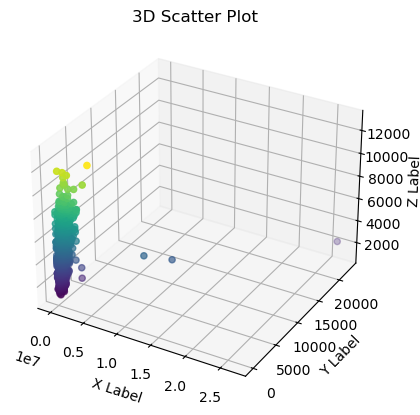

In [338]:
# 3D Scatter Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_cleaned['price'], df_cleaned['price_per_sqft'], df_cleaned['sqft_living'] * 2, c=df_cleaned['sqft_living'], cmap='viridis')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title("3D Scatter Plot")
plt.show()